<h1 id="other_data">Exploring Another Dataset (Part 3)</h1>

<p>It turns out that keras has a few other data sets built-in.  Lets look at another one.  The MNIST database of handwritten digits is one of the classic beginner ML problems.  The data is 60,000 grayscale images each of which are a handwritten number between 0 and 9.  So our labels then are the set of numbers between 0 and 9.  Keras has other built-in datasets which can be accessed <a href="https://keras.io/datasets/">here.</a></p>

<p>Anyway lets load the datasets.  This time I use the more traditional X and Y variables names that we see in a lot of the ML literature.</p>

In [1]:
# Import everything we need.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from plot import plotHistory

In [2]:
# load data into training sets and validation sets.
(X_t, Y_t), (X_v, Y_v) = keras.datasets.mnist.load_data()

<p>Again we need scaled the dataset to unity since the image is a grayscale image with integer values between 0 and 255.</p>

In [3]:
X_t = X_t/255.0
X_v = X_v/255.0

<p>Before trying something new lets train the same network we trained in the keras tutorial to get a baselineon what kind of accuracy we can expect.  We do that here and plot the results all in one cell since it isn't something we haven't seen before.</p>

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2652 - acc: 0.9234 - val_loss: 0.1311 - val_acc: 0.9614
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1120 - acc: 0.9671 - val_loss: 0.1004 - val_acc: 0.9684
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0765 - acc: 0.9770 - val_loss: 0.0909 - val_acc: 0.9721
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0567 - acc: 0.9826 - val_loss: 0.0818 - val_acc: 0.9758
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.0752 - val_acc: 0.9769
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0344 - acc: 0.9891 - val_loss: 0.0772 - val_acc: 0.9770
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0743 - val_acc

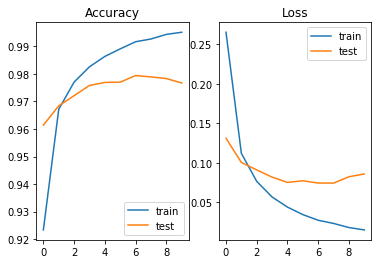

In [4]:
# Set the model up.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Recompile the model to reset it.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Save the weights so we can restore the model.
weights = model.get_weights()

# Train the old model using the new data set.
history = model.fit(X_t, Y_t, epochs=10, validation_data=(X_v, Y_v))

# Plot the results.
plotHistory(history)

<h2>Underfitting</h2>
<p>Wow! 98% on the validation using such a simple model!</p>
<p>The assignment asks us to demonstrate a configuration where the data underfits.  Before we do that lets think about what our accuracy and loss plots might look like in such a scenario... Since the model is underfitting (Aka it has high bias) <b>we expect that the accuracy of both the test set and the training set to be low, and the loss for both sets to be high.</b> There are several ways to bias the model.  They include, but are not limited to:</p>
<ol>
    <li>Not training long enough</li>
    <li>Using a hypothesis set that is too simple</li>
    <li>Over regularizing the model</li>
</ol>

<p>Lets look at item 1 first.  I'm going to reset our model before training again since otherwise we would start from where we left off in the cell above.  Then lets just train for 2 epochs and observe the results.</p>


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 79us/step - loss: 0.2126 - acc: 0.9370 - val_loss: 0.1190 - val_acc: 0.9645
Epoch 2/2
60000/60000 [==============================] - 5s 78us/step - loss: 0.0963 - acc: 0.9716 - val_loss: 0.0922 - val_acc: 0.9725


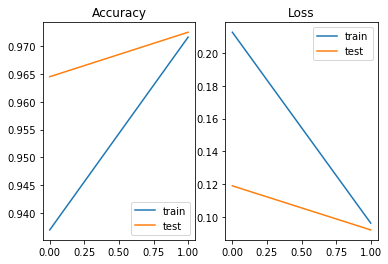

In [7]:
# Reset the model using the weights we stored when it was originally created.
model.set_weights(weights)

# Train the old model using the new data set.
history = model.fit(X_t, Y_t, epochs=2, validation_data=(X_v, Y_v))

# Plot the results.
plotHistory(history)

<p>Okay... suprisingly that still actually does very well.</p>
<p>Lets try the second thing on our list and simplify our hypothesis set.  The intuition here is that by reducing the hypothesis (Making the model simpler) we reduce the number of different functions that it can actually represent.  For this trial lets make a new model but this time well just put 5 neurons in the hidden layer.</p>

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 1.1066 - acc: 0.6639 - val_loss: 0.8005 - val_acc: 0.7594
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.7374 - acc: 0.7759 - val_loss: 0.6693 - val_acc: 0.7992
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.6384 - acc: 0.8070 - val_loss: 0.6165 - val_acc: 0.8157
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.5908 - acc: 0.8214 - val_loss: 0.5791 - val_acc: 0.8316
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.5663 - acc: 0.8287 - val_loss: 0.5688 - val_acc: 0.8324
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.5520 - acc: 0.8342 - val_loss: 0.5587 - val_acc: 0.8365
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.5410 - acc: 0.8375 - val_loss: 0.5534 - val_acc

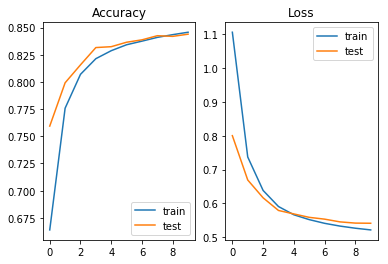

In [8]:
# Set the model up.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Recompile the model to reset it.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the old model using the new data set.
history = model.fit(X_t, Y_t, epochs=10, validation_data=(X_v, Y_v))

# Plot the results.
plotHistory(history)

<p>Even with only five hidden layers we still get up to 84% accuracy on the validation set.  We can clearly see despite running the same number of epochs we have severly underfit the model since before we were able to get 99% on our training set.</p>
<p>For thoroughness lets put the model back to our original model back to our original structure, but this time lets add a regularization parameter to the hidden layer.  A regularization parameter is essentially a term that gets added to the loss function that clamps the weights of the layer to 0.  Generally it is a number between 0 and 1 with a regularization paramter of 1 clamping the weights to 0 indefinatly and a regularization paramter of 0 not performing any regularization at all.</p>
<p>Lets use a very large regularization parameter of 0.007 just so we can observe some dramatic results.</p>

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/step - loss: 2.2026 - acc: 0.1838 - val_loss: 2.0657 - val_acc: 0.2282
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 1.9987 - acc: 0.2505 - val_loss: 1.9435 - val_acc: 0.2682
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 1.8226 - acc: 0.3240 - val_loss: 1.6831 - val_acc: 0.3889
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 1.6374 - acc: 0.3947 - val_loss: 1.6147 - val_acc: 0.3993
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 1.5839 - acc: 0.4113 - val_loss: 1.5568 - val_acc: 0.4188
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 1.5292 - acc: 0.4320 - val_loss: 1.5213 - val_acc: 0.4482
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 1.4901 - acc: 0.4587 - val_loss: 1.4851 - val_acc

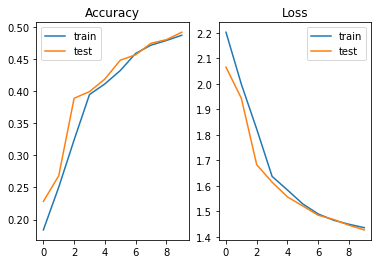

In [25]:
from keras import regularizers

# Set the model up and include a bias regularizer in the hidden layer.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu, activity_regularizer=regularizers.l1(0.007)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Recompile the model to reset it.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the old model using the new data set.
history = model.fit(X_t, Y_t, epochs=10, validation_data=(X_v, Y_v))

# Plot the results.
plotHistory(history)

<p>See how the accuracy only makes it up to 49% for the test set where before with the same number of iterations we were able to acheive 99%.</p>
<p>Note: I tried seeting it higher than 0.007 and the model actually couldn't learn anything at all.</p>